Importing necessary libraries


In [3]:
import pandas as pd
import numpy as np

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [11]:
clean_employment = pd.read_csv('clean_employment.csv')
print(clean_employment.head())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  


Validating datasets

In [12]:
# Check for missing values in each column
missing_values = clean_employment.isnull().sum()
print("Missing values:")
print(missing_values)

# Check data types
print("Data types:")
print(clean_employment.dtypes)

# Check for duplicate entries
duplicate_rows = clean_employment.duplicated().sum()
print("Duplicate entries:")
print(duplicate_rows)


Missing values:
country_code    0
country_name    0
continent       5
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64
Data types:
country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object
Duplicate entries:
0


Summarizing the dataset statistics

In [13]:
# Calculate basic statistics for numerical columns
print("Basic statistics:")
print(clean_employment.describe())

# Count the frequency of each continent
print("Continent frequency:")
print(clean_employment['continent'].value_counts())

Basic statistics:
             2010        2011        2012        2013        2014        2015  \
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000   
mean     8.409286    8.315440    8.317967    8.344780    8.179670    8.058901   
std      6.248887    6.266795    6.367270    6.416041    6.284241    6.161170   
min      0.450000    0.320000    0.480000    0.250000    0.200000    0.170000   
25%      4.015000    3.775000    3.742500    3.692500    3.625000    3.662500   
50%      6.965000    6.805000    6.690000    6.395000    6.450000    6.170000   
75%     10.957500   11.045000   11.285000   11.310000   10.695000   10.215000   
max     32.020000   31.380000   31.020000   29.000000   28.030000   27.690000   

             2016        2017        2018        2019        2020        2021  
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000  
mean     7.925879    7.668626    7.426429    7.243736    8.420934    8.390879  
std      6.0

Calculating correlation matrix

<ipython-input-14-2178824f4543>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_employment.corr()


Correlation matrix:
          2010      2011      2012      2013      2014      2015      2016  \
2010  1.000000  0.983302  0.959482  0.938352  0.932376  0.926478  0.915445   
2011  0.983302  1.000000  0.989129  0.972238  0.961294  0.950839  0.932280   
2012  0.959482  0.989129  1.000000  0.990797  0.980381  0.967582  0.943792   
2013  0.938352  0.972238  0.990797  1.000000  0.993507  0.981958  0.958616   
2014  0.932376  0.961294  0.980381  0.993507  1.000000  0.993358  0.974801   
2015  0.926478  0.950839  0.967582  0.981958  0.993358  1.000000  0.990690   
2016  0.915445  0.932280  0.943792  0.958616  0.974801  0.990690  1.000000   
2017  0.893109  0.906464  0.914858  0.927020  0.948567  0.971876  0.990905   
2018  0.876591  0.886951  0.890047  0.899154  0.923118  0.951237  0.976102   
2019  0.853813  0.858562  0.857046  0.864989  0.892251  0.924355  0.955525   
2020  0.842922  0.841093  0.833292  0.839625  0.865600  0.896172  0.931678   
2021  0.829944  0.831902  0.824336  0.829453

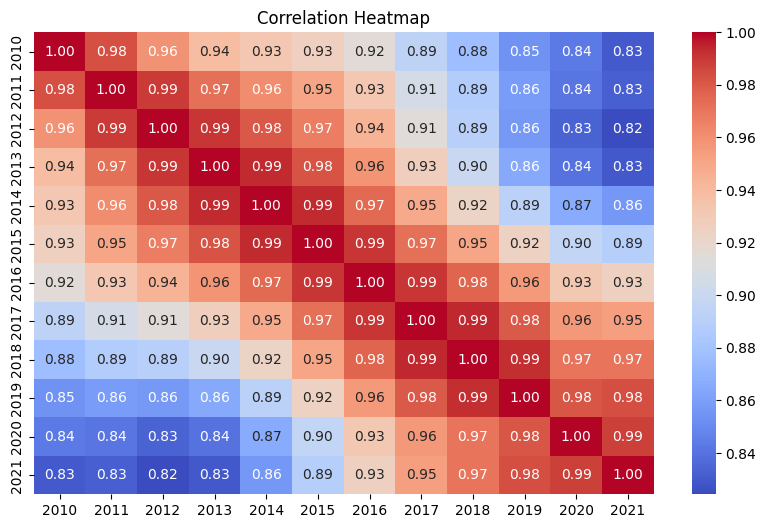

In [14]:
# Calculate correlation coefficients
correlation_matrix = clean_employment.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# Separate features (X) and target variable (y)
X = clean_employment.drop(columns=['country_code', 'country_name', 'continent'])  # Assuming these are the features
y = clean_employment['2021']  # Assuming '2021' column is the target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (145, 12)
Testing set shape: (37, 12)
